In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import os

## Text Summarization Metrics Diagrams

In [2]:
csv_dir = "./results"
all_files = [os.path.join(csv_dir, f) for f in os.listdir(csv_dir)]

# Combine all files into a single DataFrame
df_all = pd.concat([pd.read_csv(f) for f in all_files], ignore_index=True)

# Get available subjects
subjects = df_all['Subject'].unique().tolist()

# Dropdown to choose subject
dropdown = widgets.Dropdown(
    options=subjects,
    description='Subject:',
    value=subjects[0],
    layout=widgets.Layout(width='50%')
)

In [3]:
def plot_for_subject(subject):
    df = df_all[df_all['Subject'] == subject].copy()

    # Average ROUGE values
    df['ROUGE_Precision_avg'] = df[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df['ROUGE_Recall_avg'] = df[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df['ROUGE_F1_avg'] = df[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Select relevant columns
    df_plot = df[['Model', 'BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']]
    df_melted = pd.melt(df_plot, id_vars='Model', var_name='Metric', value_name='Score')

    # Plot
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Comparison on Subject: "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [4]:
widgets.interact(plot_for_subject, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('IT', 'AI', 'footb…

<function __main__.plot_for_subject(subject)>

In [5]:
def plot_overall_averages():
    # Calculate average values for all subjects and models
    df_avg = df_all.copy()
    
    # Average ROUGE values for all models
    df_avg['ROUGE_Precision_avg'] = df_avg[['ROUGE-1 Precision', 'ROUGE-2 Precision', 'ROUGE-L Precision']].mean(axis=1)
    df_avg['ROUGE_Recall_avg'] = df_avg[['ROUGE-1 Recall', 'ROUGE-2 Recall', 'ROUGE-L Recall']].mean(axis=1)
    df_avg['ROUGE_F1_avg'] = df_avg[['ROUGE-1 F1', 'ROUGE-2 F1', 'ROUGE-L F1']].mean(axis=1)

    # Group by Model and calculate mean per model
    df_avg_grouped = df_avg.groupby('Model')[['BLEU', 'METEOR', 'ROUGE_Precision_avg', 'ROUGE_Recall_avg', 'ROUGE_F1_avg']].mean().reset_index()

    # Plot overall average metrics
    df_melted_avg = pd.melt(df_avg_grouped, id_vars='Model', var_name='Metric', value_name='Average Score')
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted_avg, x='Metric', y='Average Score', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Across All Subjects')
    plt.xlabel('Metrics')
    plt.ylabel('Average Scores')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

In [6]:
df_all

,Model,Subject,BLEU,METEOR,ROUGE-1 Precision,ROUGE-1 Recall,ROUGE-1 F1,ROUGE-2 Precision,ROUGE-2 Recall,ROUGE-2 F1,ROUGE-L Precision,ROUGE-L Recall,ROUGE-L F1,Accuracy,Coherence,Concision,Overall average score
0,Hacker-News-Comments-Summarization-Llama-3.1-8...,IT,0.227218,0.404383,0.511450,0.424051,0.463668,0.219388,0.192825,0.205251,0.458015,0.379747,0.415225,NaN,NaN,NaN,NaN
1,Hacker-News-Comments-Summarization-Llama-3.1-8...,AI,0.297170,0.546064,0.488889,0.511628,0.500000,0.230769,0.260870,0.244898,0.466667,0.488372,0.477273,NaN,NaN,NaN,NaN
2,Hacker-News-Comments-Summarization-Llama-3.1-8...,football,0.114440,0.358647,0.573171,0.373016,0.451923,0.239669,0.169591,0.198630,0.524390,0.341270,0.413462,NaN,NaN,NaN,NaN
3,Hacker-News-Comments-Summarization-Llama-3.1-8...,hangfajl,0.036844,0.165379,0.644444,0.224806,0.333333,0.298246,0.101190,0.151111,0.622222,0.217054,0.321839,NaN,NaN,NaN,NaN
4,Llama-3.2-1B-Instruct-Q4_K_M,IT,0.139911,0.326729,0.545455,0.341772,0.420233,0.202797,0.130045,0.158470,0.515152,0.322785,0.396887,NaN,NaN,NaN,NaN
5,Llama-3.2-1B-Instruct-Q4_K_M,football,0.142339,0.303570,0.736111,0.420635,0.535354,0.375000,0.210526,0.269663,0.666667,0.380952,0.484848,NaN,NaN,NaN,NaN
6,Llama-3.2-1B-Instruct-Q4_K_M,AI,0.223411,0.522833,0.381818,0.488372,0.428571,0.203390,0.260870,0.228571,0.327273,0.418605,0.367347,NaN,NaN,NaN,NaN
7,Llama-3.2-1B-Instruct-Q4_K_M,hangfajl,0.063386,0.275295,0.384615,0.271318,0.318182,0.110169,0.077381,0.090909,0.351648,0.248062,0.290909,NaN,NaN,NaN,NaN
8,SummLlama3.2-3B-Q4_K_M,AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.5,9.5,7.5,8.3
9,SummLlama3.2-3B-Q4_K_M,IT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,9.5,8.5,8.5


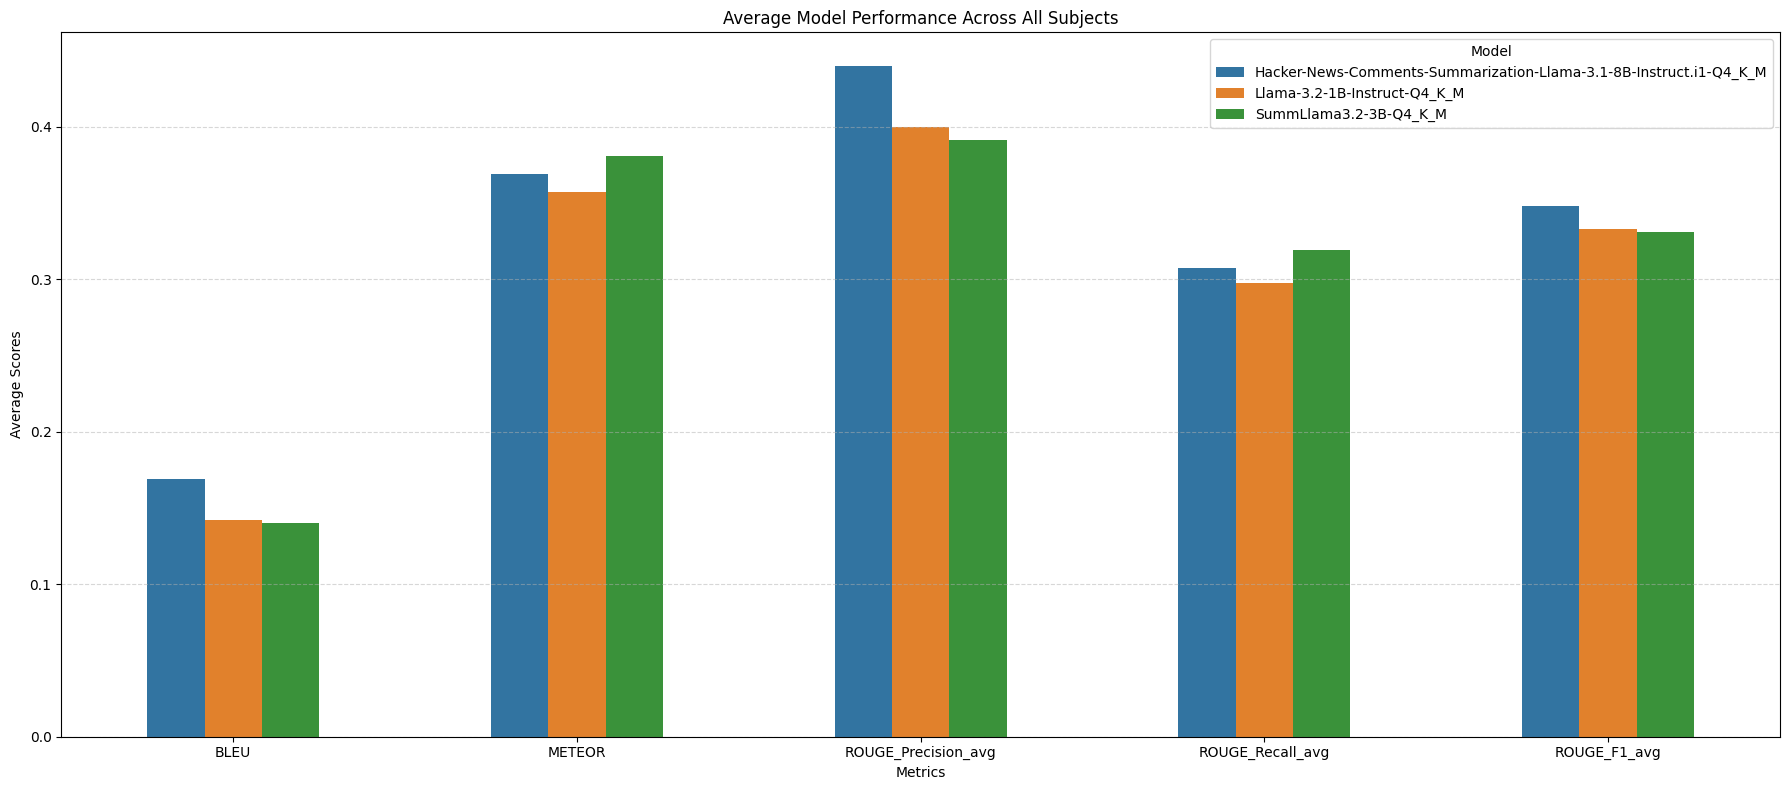

In [7]:
plot_overall_averages()

## Model Performance Metrics Diagrams

In [8]:
csv_dir_performance = "./outputs"
all_performance_files = [os.path.join(csv_dir_performance, f) for f in os.listdir(csv_dir_performance) if f.endswith(".csv")]

# Combine all performance files into a single DataFrame
df_all_performance = pd.concat([pd.read_csv(f) for f in all_performance_files], ignore_index=True)

In [9]:
def plot_performance_metrics(subject):
    df = df_all_performance[df_all_performance['Subject'] == subject].copy()
    
    # Melt the dataframe to long format for plotting (excluding Memory Usage)
    df_melted = pd.melt(df, id_vars=['Model', 'Subject'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                        var_name='Metric', value_name='Value')

    # Plot the performance metrics (excluding Memory Usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Model Performance Metrics (excluding Memory Usage) for "{subject}"')
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Now plot Memory Usage on a separate diagram
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Memory Usage for "{subject}"')
    plt.xlabel('Model')
    plt.ylabel('Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [10]:
widgets.interact(plot_performance_metrics, subject=dropdown)

interactive(children=(Dropdown(description='Subject:', layout=Layout(width='50%'), options=('IT', 'AI', 'footb…

<function __main__.plot_performance_metrics(subject)>

In [11]:
def plot_average_performance_metrics():
    # Calculate the average values for all models across all subjects
    df_avg = df_all_performance.groupby(['Model'])[['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count', 'Memory Usage (MB)']].mean().reset_index()

    # Melt the dataframe to long format for the summary plot (excluding Memory Usage)
    df_avg_melted = pd.melt(df_avg, id_vars=['Model'], value_vars=['Generation Time (seconds)', 'CPU Usage (%)', 'Token Count'],
                            var_name='Metric', value_name='Average Value')

    # Plot the summary metrics (average values) for all metrics except Memory Usage
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg_melted, x='Metric', y='Average Value', hue='Model', palette='tab10', width=0.5)
    plt.title(f'Average Model Performance Metrics (excluding Memory Usage)')
    plt.xlabel('Metrics')
    plt.ylabel('Average Values')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.legend(title='Model')
    plt.show()

    # Plot Memory Usage on a separate diagram (average memory usage)
    plt.figure(figsize=(18, 8))
    sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)
    plt.title(f'Average Memory Usage for Models')
    plt.xlabel('Model')
    plt.ylabel('Average Memory Usage (MB)')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


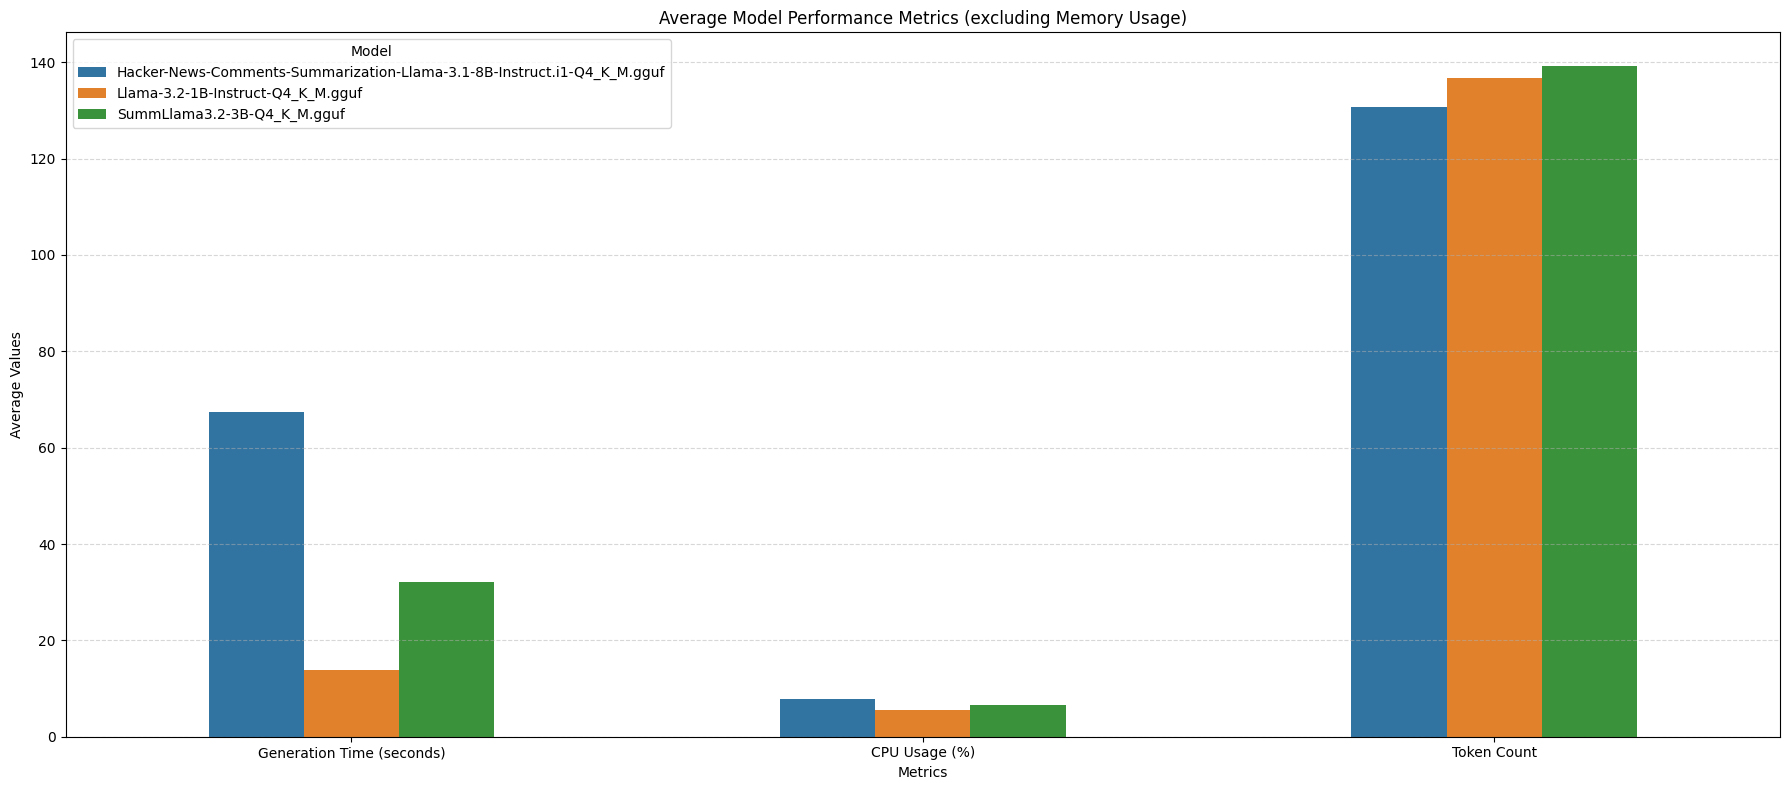

C:\Users\USER\AppData\Local\Temp\ipykernel_3804\1551005135.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg, x='Model', y='Memory Usage (MB)', palette='tab10', width=0.2)


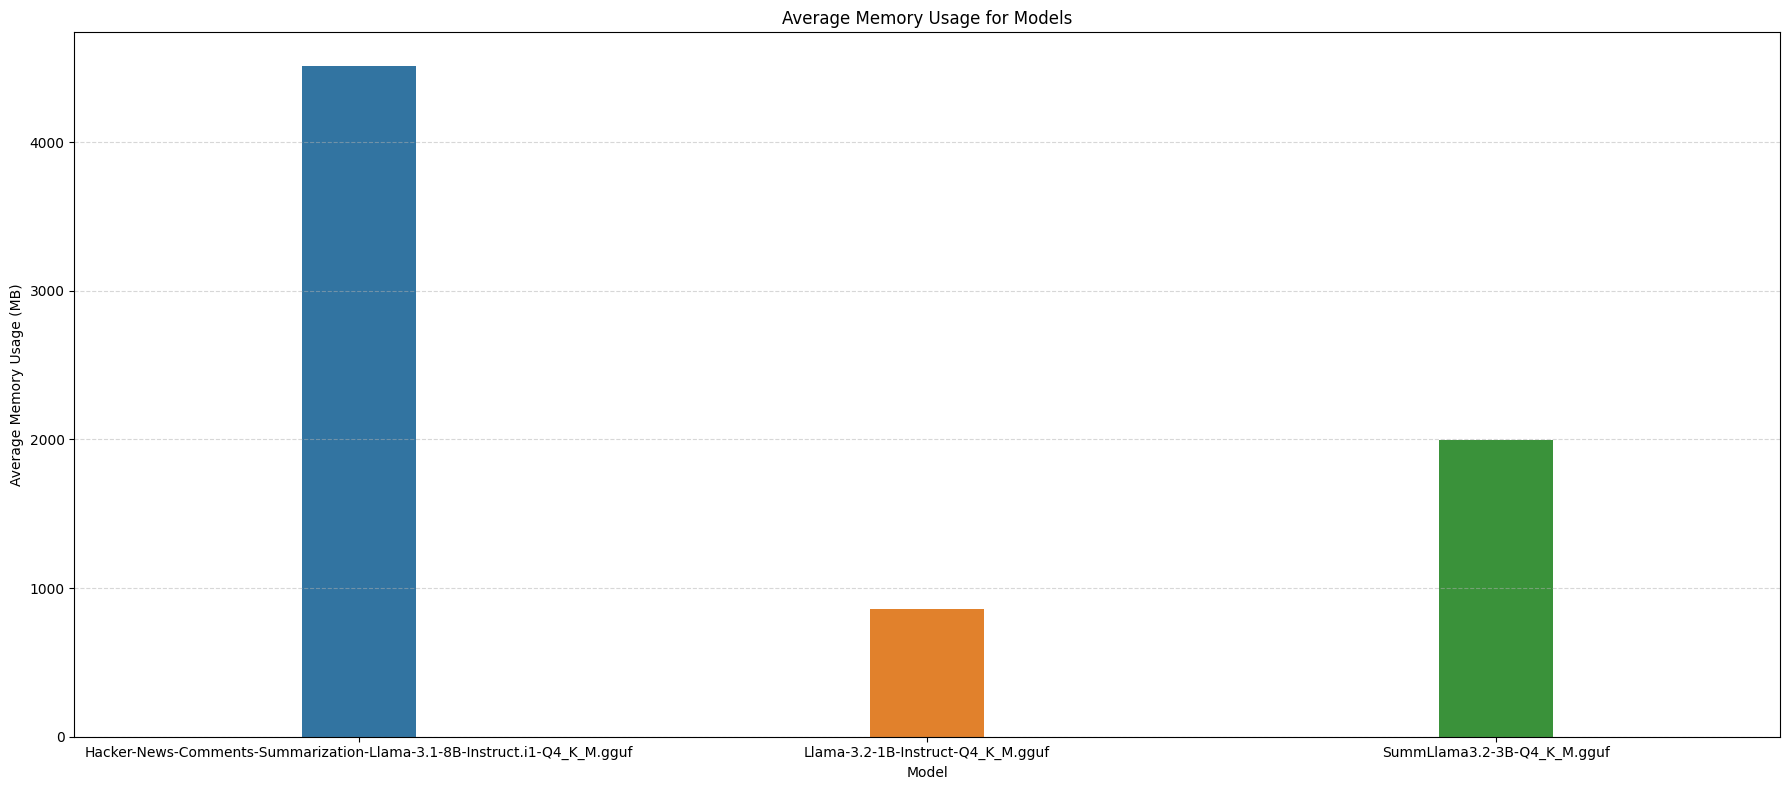

In [12]:
plot_average_performance_metrics()